In [1]:
# Random 3D Dataset

import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [2]:
# PCA Using SVD Decomposition

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

print(c1)
print(c2)


[0.93636116 0.29854881 0.18465208]
[-0.34027485  0.90119108  0.2684542 ]


In [3]:
# Projecting the above dataset to 2D using SVD

W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [4]:
# Using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

# Explained variance ratio

print(pca.explained_variance_ratio_)

[0.84248607 0.14631839]


In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# Finding number of dimensions

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>= 0.95) + 1   #Then use n_components = d
print(d)

#Easier version

pca = PCA(n_components = 0.95) #Float between 0 and 1 to preserve that amount of variance
X_reduced = pca.fit_transform(X)

154


<function matplotlib.pyplot.show(*args, **kw)>

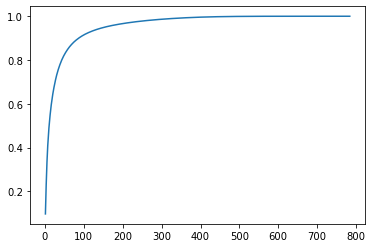

In [7]:
#Plotting explained variance ratio against number of dimensions

import matplotlib.pyplot as plt

plt.plot([i for i in range(1, 785)], cumsum)
plt.show

In [8]:
#For construction then deconstruction

pca = PCA(n_components = 154)
X_mnist_reduced = pca.fit_transform(X_train)
X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)

In [9]:
# Incremental PCA

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_mnist_reduces = inc_pca.transform(X_train)

In [10]:
# Randomized PCA

rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

In [11]:
# Kernel PCA

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X)


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
                ("kpca", KernelPCA(n_components =2)),
                ("log_reg", LogisticRegression())
])

param_grid = [{
                "kpca_gamma": np.linspace(0.03, 0.05, 10),
                "kpca_kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X,y)

print(grid_search.best_params_)

ValueError: Found input variables with inconsistent numbers of samples: [60, 70000]

In [14]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,fit_inverse_transform=True)

X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)


0.19200407412218212

In [1]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

NameError: name 'X' is not defined